## Pandas Exercise
10/07/2018  -  Jens Hahn, Ana Bulovic, Jorin Diemer

Data file *my_yeast_genome.tsv* was downloaded from [**YeastMine**](yeastgenome.org)

## Assignments
1. What are the dimensions (rows, columns) of the data?
2. How does the data look like?
3. Set the header of the table.
4. Are duplicates in the data?
5. What is the average mRNA length?
6. How many adenines are in the coding part of the genome?
7. Are there missing sequences in the data?
8. Plot the mRNA lengths.

In [1]:
# import packages pandas and matplotlib
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
# create DataFrame object from tsv file
df = pd.read_csv('./my_yeast_genome.tsv', sep='\t', header=None)

1 Dimensions of the data

In [3]:
# check the dimensions of the data
print(df.shape)
print('The data has {} rows and {} columns'.format(df.shape[0],
                                                   df.shape[1]))

(17902, 9)
The data has 17902 rows and 9 columns


2 How does the data look like

In [4]:
# have a look on the first 5 rows of the table
df.head()

,0,1,2,3,4,5,6,7,8
0,S. cerevisiae,S000000003,YAL003W,EFB1,Elongation Factor Beta,ATGGCATCCACCGATTTCTCCAAGATTGAAACTTTGAAACAATTAA...,1027,AATGGCATCCACCGATTTCTCCAAGATTGAAACTTTGAAACAATTA...,987
1,S. cerevisiae,S000000003,YAL003W,EFB1,Elongation Factor Beta,ATGGCATCCACCGATTTCTCCAAGATTGAAACTTTGAAACAATTAA...,1033,ACACATAATGGCATCCACCGATTTCTCCAAGATTGAAACTTTGAAA...,987
2,S. cerevisiae,S000000003,YAL003W,EFB1,Elongation Factor Beta,ATGGCATCCACCGATTTCTCCAAGATTGAAACTTTGAAACAATTAA...,1039,ATATACACACATAATGGCATCCACCGATTTCTCCAAGATTGAAACT...,987
3,S. cerevisiae,S000000003,YAL003W,EFB1,Elongation Factor Beta,ATGGCATCCACCGATTTCTCCAAGATTGAAACTTTGAAACAATTAA...,1045,ATATACACACATAATGGCATCCACCGATTTCTCCAAGATTGAAACT...,987
4,S. cerevisiae,S000000003,YAL003W,EFB1,Elongation Factor Beta,ATGGCATCCACCGATTTCTCCAAGATTGAAACTTTGAAACAATTAA...,1047,AACCGAATATATACACACATAATGGCATCCACCGATTTCTCCAAGA...,987


3 Set column headers

In [5]:
df.columns = ['organism', 'id', 'systematic', 'standard',
             'function', 'sequence', 'gen length', 'seq mRNA',
             'mRNA length']
df.head()

,organism,id,systematic,standard,function,sequence,gen length,seq mRNA,mRNA length
0,S. cerevisiae,S000000003,YAL003W,EFB1,Elongation Factor Beta,ATGGCATCCACCGATTTCTCCAAGATTGAAACTTTGAAACAATTAA...,1027,AATGGCATCCACCGATTTCTCCAAGATTGAAACTTTGAAACAATTA...,987
1,S. cerevisiae,S000000003,YAL003W,EFB1,Elongation Factor Beta,ATGGCATCCACCGATTTCTCCAAGATTGAAACTTTGAAACAATTAA...,1033,ACACATAATGGCATCCACCGATTTCTCCAAGATTGAAACTTTGAAA...,987
2,S. cerevisiae,S000000003,YAL003W,EFB1,Elongation Factor Beta,ATGGCATCCACCGATTTCTCCAAGATTGAAACTTTGAAACAATTAA...,1039,ATATACACACATAATGGCATCCACCGATTTCTCCAAGATTGAAACT...,987
3,S. cerevisiae,S000000003,YAL003W,EFB1,Elongation Factor Beta,ATGGCATCCACCGATTTCTCCAAGATTGAAACTTTGAAACAATTAA...,1045,ATATACACACATAATGGCATCCACCGATTTCTCCAAGATTGAAACT...,987
4,S. cerevisiae,S000000003,YAL003W,EFB1,Elongation Factor Beta,ATGGCATCCACCGATTTCTCCAAGATTGAAACTTTGAAACAATTAA...,1047,AACCGAATATATACACACATAATGGCATCCACCGATTTCTCCAAGA...,987


#### 4 Duplicates    
*Yeast has about 6600 genes, the tables has over 17000 rows. There have to be duplicates*    
   a) How many rows contain the first gene?    
   b) Are these rows just replicates?    

In [11]:
first_gene_entries = df[df['systematic'] == 'YAL003W'].shape[0]
print("The first gene is {} times in the table.".format(first_gene_entries))

The first gene is 39 times in the table.


In [16]:
print(df.iloc[0] == df.iloc[1])

organism        True
id              True
systematic      True
standard        True
function        True
sequence        True
gen length     False
seq mRNA       False
mRNA length     True
dtype: bool


5 average mRNA length

In [20]:
print("The average mRNA length is {}".format(
      df['mRNA length'].mean()))

The average mRNA length is 819.6249022455592


#### 6 How many adenines
a) Remove duplicated gene entries    
b) Calculate abundance of As    

In [21]:
# make a new DataFrame with only the gene id columns
# remove duplicates here
df_clean = df[['systematic', 'standard', 'id']]
df_clean = df_clean.drop_duplicates()

In [22]:
# use the indexes from the smaller table for calculation
from collections import Counter
a = 0

for index in df_clean.index:
    seq = df.iloc[index, 5]
    c = Counter(seq)
    a += c['A']

In [26]:
print("The coding part of the genome contains \
about {} adenine".format(a))

The coding part of the genome contains about 1099826 adenine


7 Missing sequences

In [27]:
# taken from Kai
no_sequence = 0

for length in df['mRNA length']:
    if type(length) != int or length == 0:
        no_sequence += 1
        
print('Table contains {} missing sequences'.format(no_sequence))

Table contains 0 missing sequences


8 Plot mRNA lengths

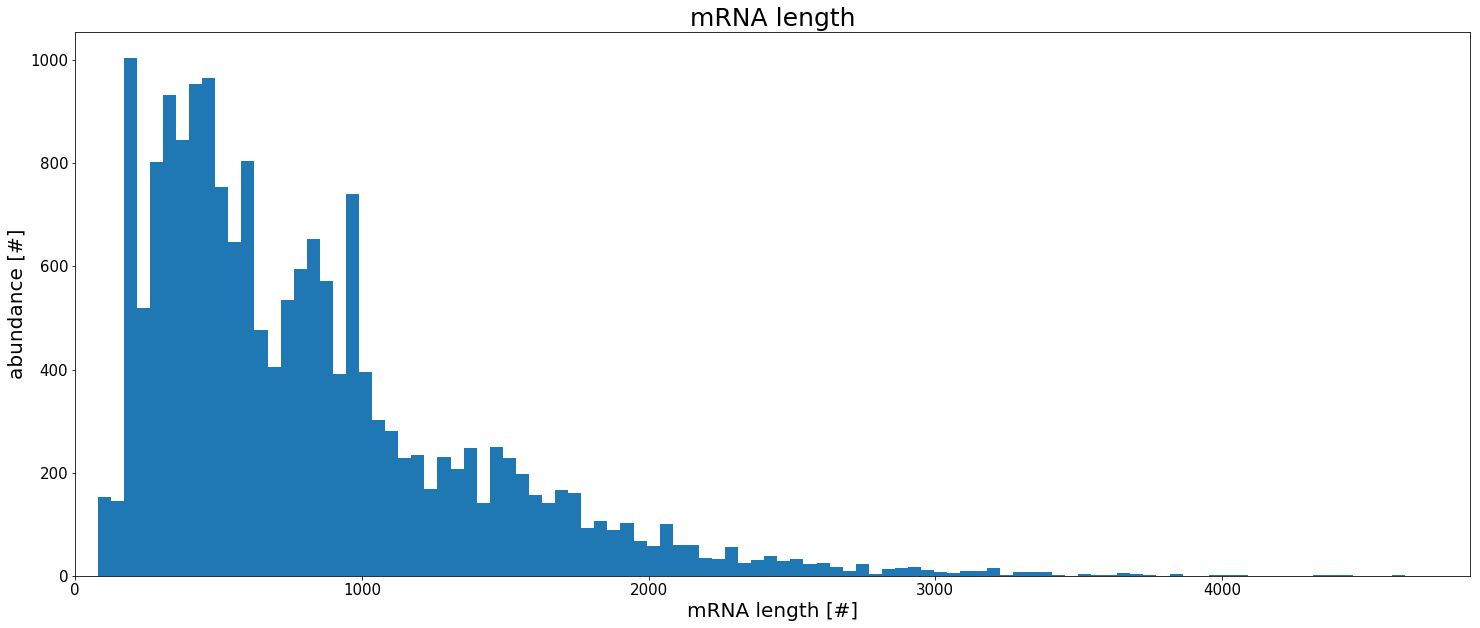

In [42]:
fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot(111)
ax.hist(df['mRNA length'], 100)
ax.set_title('mRNA length', fontsize=25)
ax.set_xlabel('mRNA length [#]', fontsize=20)
ax.set_ylabel('abundance [#]', fontsize=20)
ax.tick_params('both', labelsize=15)
ax.set_xlim(0);